## DB

In [ ]:
import sqlite3

def get_table_names(file_path):
    
    # Create a SQL connection to our SQLite database
    con = sqlite3.connect(file_path)

    # creating cursor
    cur = con.cursor()

    # reading all table names
    table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' OR type = 'view'")]

    # Be sure to close the connection
    con.close()

    table_names = [name[0] for name in table_list]

    return table_names


def print_data(file_path, table_name = None):
    
    if table_name is None:
        table_names = get_table_names(file_path)

        # Create a SQL connection to our SQLite database
        con = sqlite3.connect(file_path)

        cur = con.cursor()

        # The result of a "cursor.execute" can be iterated over by row
        for name in table_names:
            if name == 'ElementaryGeometries' or name == 'SpatialIndex':
                continue
            sql_command = "SELECT * FROM " + name
            print(name)
            for row in cur.execute(sql_command):
                print(row)
            print('\n\n')

        # Be sure to close the connection
        con.close()
    
    else:
        # Create a SQL connection to our SQLite database
        con = sqlite3.connect(file_path)

        cur = con.cursor()

        # The result of a "cursor.execute" can be iterated over by row
        sql_command = "SELECT * FROM " + table_name
        print(table_name)
        for row in cur.execute(sql_command):
            print(row)

        # Be sure to close the connection
        con.close()

In [ ]:
a = get_table_names(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db")
len(a)
print(a)

In [ ]:
import sqlite3

def initialize(file_path):
    
    # Create a SQL connection to our SQLite database
    # returns connection and cursor

    con = sqlite3.connect(file_path)
    cur = con.cursor()
    print('Opening connection')

    return cur, con


def finilize(con):

    # Closes SQL connection

    con.close()
    print('Closing connection')

In [ ]:
def work(file_path, sql):
    
    cur, con = initialize(file_path)
    out = cur.execute(sql)
    print('SQL done')
    
    table_list = [a[0] for a in out] #why do I get ordered output sometimes???
    print('Work completed')

    finilize(con)

    return table_list

In [ ]:
sql = "SELECT DISTINCT Area FROM RoomElements LIMIT 10"
table_list = work(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", sql)

print(table_list)

In [ ]:
import sqlite3

def generate_docs(db, docs, title):
    # open doc file and define table template
    f = open(docs, "w+")
    f.write(title + "\n")
    table_template = "|{}|{}|\n| :-: | :-:|\n".format("COLUMN", "DESCRIPTION")
    # open database
    con = sqlite3.connect(db)
    cur = con.cursor()
    cur.execute("SELECT name FROM sqlite_master WHERE type='view';")
    for table in cur.fetchall():
        # print table name
        table_name = table[0].upper()
        f.write("### {}\n".format(table_name))
        f.write(table_template)
        if table_name == 'ELEMENTARYGEOMETRIES' or table_name == 'SPATIALINDEX':
            continue
        # print table columns
        cur.execute("SELECT * FROM {};".format(table_name))
        cols = [description[0] for description in cur.description]
        for col in cols:
            f.write("| {} | |\n".format(col))
    f.close()


generate_docs(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", "db_template_views.md",
              "Room schema")

In [ ]:
# issue with SpatialIndex and ElementaryGeometries
print_data(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", 'SpatialIndex')

In [ ]:
import pymysql
  
def mysqlconnect():
    # To connect MySQL database
    conn = pymysql.connect(
        host='192.168.2.140',
        user='admin', 
        password = "admin",
        db='db',
        port=6606
        )
      
    cur = conn.cursor()
    cur.execute("select @@version")
    output = cur.fetchall()
    print(output)
      
    # To close the connection
    conn.close()

In [ ]:
mysqlconnect()

In [ ]:
#import os
import pymysql
import pandas as pd

""" host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')
 """

conn = pymysql.connect(
    host='192.168.2.140',
    user='admin', 
    password = "admin",
    db='db',
    port=6606
    )

#df = pd.read_sql_query("SELECT * FROM folders", conn)

In [ ]:
pd.read_sql_query("SELECT table_name FROM information_schema.tables", conn)

In [ ]:
a = pd.read_sql_query("SELECT name FROM versions", conn)
b = pd.read_sql_query("SELECT display_name FROM items", conn)

In [ ]:
a['name'] == b['display_name']

## GAN

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


torch.manual_seed(111)


device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)


train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)


batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)


real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [ ]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

# Creating json

<ol>
  <li>Input is an image from RPLAN dataset</li>
  <li>Read image and get room type and coordinates of walls, last entry is just index of room
    <ul>
      <li>What is poly?</li>
    </ul>
  </li>
  <li>Transform image to json</li>
</ol>

In [1]:
line = r'C:\Users\Administrator\Desktop\Example data\0.png'

In [2]:
import numpy as np
from data_reader.read_dd import read_data

In [3]:
rms_type,poly,doors,walls,out = read_data(line)

In [14]:
from PIL import Image
img = np.asarray(Image.open(line))
img_room_type=img[:,:,1]
img_room_number=img[:,:,2]

In [15]:
print(img_room_number)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
from matplotlib import pyplot as plt

def floor_plan(walls):

    fig = plt.figure()
    
    for line in walls:
        plt.plot([line[0], line[2]], [-line[1], -line[3]], color='black')

    plt.ylim([-256, 0])
    plt.xlim([0, 256])

    fig.set_size_inches(12, 12)

In [9]:
#removed original plot, added custom and changed name of output file, removed parse_args
#adjusted reference to walls as I removed some entries in read_dd.py

def raster_to_json(line):
    """ convert extracted data from rasters to housegan ++ data format :  extract rooms type, bbox, doors, edges and neigbour rooms
                
    """
    #fig = plt.figure()
    #ax = fig.add_subplot(1, 1, 1)
    bbox_x1=[]
    bbox_y1=[]
    bbox_x2=[]
    bbox_y2=[]
    walls=[]

    room_type,poly,doors_, walls,out=read_data(line)
    d=[]
    all_doors=[]
    for i in range(1,len(doors_)+1):
        if((i)%4==0 ) & (i+1!=1):
            d.append(doors_[i-1])
            all_doors.append(d)
            d=[]
        elif(i==1):
            d=[]
        if(i%4!=0):
            d.append(doors_[i-1])
    kh=0
    al_dr=0
    for hd in range(len(all_doors)):
        dr_t=[]
        dr_in=[]
        doors=all_doors[hd]
        d_t=2
        t_x=abs(doors[0][1]-doors[1][1])
        t_y=abs(doors[0][0]-doors[3][0])
        ss=t_x
        if(t_x>t_y):
           d_t=1
           ss=t_y
        elif(t_x<t_y):
           d_t=3
        for pmc in range(5):
            for dw in range(len(doors)):      
                for nw in range(len(walls)) :
                    if(walls[nw][4]==17):
                        continue
                    if(walls[nw][4]==15):
                        continue
                    if (d_t<=2) &(doors[dw][0]-doors[dw][2]<=1)& (walls[nw][0]-walls[nw][2]<=1)& (abs(doors[dw][0]-walls[nw][0])<=(ss-1)) & (abs(doors[dw][2]-walls[nw][2])<=(ss-1)): 
                        l=doors[dw][1]
                        r=doors[dw][3]
                        if(l>r):
                            t=l
                            l=r
                            r=t
                        l_=walls[nw][1]
                        r_=walls[nw][3]
                        if(l_>r_):
                            t=l_
                            l_=r_
                            r_=t
                        if (((r-r_)<=pmc )& (pmc>=(l_-l))) :
                            if(len(dr_in)<2):
                                if(walls[nw][5] not in dr_t):
                                    dr_t.append(walls[nw][5])
                                    dr_in.append(nw)
                               
                    elif (d_t>=2)& (doors[dw][1]-doors[dw][3]<=1)& (walls[nw][1]-walls[nw][3]<=1) &(abs(doors[dw][1]-walls[nw][1])<=(ss-1)) & (abs(doors[dw][3]-walls[nw][3])<=(ss-1)): 
                        l=doors[dw][0]
                        r=doors[dw][2]
                        if(l>r):
                            t=l
                            l=r
                            r=t
                        l_=walls[nw][0]
                        r_=walls[nw][2]
                        if(l_>r_):
                            t=l_
                            l_=r_
                            r_=t
                        if(((r-r_)<=pmc )& (pmc>=(l_-l))):
                            if(len(dr_in)<2):
                                if(walls[nw][5] not in dr_t):
                                    dr_t.append(walls[nw][5])
                                    dr_in.append(nw)
        if(len(dr_t)==2):
            #walls[dr_in[0]][8]=walls[dr_in[1]][5]
            #walls[dr_in[0]][7]=walls[dr_in[1]][6]    
            #walls[dr_in[1]][8]=walls[dr_in[0]][5]
            #walls[dr_in[1]][7]=walls[dr_in[0]][6]  
            al_dr=al_dr+1
                
        else:
            print("sometime not 2 dooor",hd,doors)		
    
        assert(len(dr_t)<=2)
  

    assert(al_dr==(len(all_doors)-1))
    
    
    omn=[]
    tr=0
    en_pp=0
    for nw in range(len(walls)-(len(all_doors)*4),len(walls)):
        if(tr%4==0):
            omn=[]
        tr=tr+1
        for kw in range(len(walls)-(len(all_doors)*4)+1):
            if(walls[kw][4]==17)&(walls[nw][4]==17):
                continue		
            if(walls[kw][4]==15)&(walls[nw][4]==15):
                continue		
            if(walls[kw][4]==15)&(walls[nw][4]==17):
                continue		
            for pmc in range (5):
                if(abs(walls[kw][0]-walls[nw][0])<=(ss-1)) & (abs(walls[kw][2]-walls[nw][2])<=(ss-1)):
                    l=walls[kw][1]
                    r=walls[kw][3]
                    if(l>r):
                        t=l
                        l=r
                        r=t
                    l_=walls[nw][1]
                    r_=walls[nw][3]
                    if(l_>r_):
                        t=l_
                        l_=r_
                        r_=t
                    if(pmc>=r_-r )& (l-l_<=pmc) &( nw!=kw):
                        if(walls[nw][4]==17) & (walls[kw][5] not in omn):
                            #walls[nw][8]=walls[kw][5]
                            #walls[nw][7]=walls[kw][6]    
                            omn.append(walls[kw][5])
                        if(walls[nw][4]==15):
                            #walls[nw][8]=walls[kw][5]
                            #walls[nw][7]=walls[kw][6] 
                            en_pp=1 
                 
                if(abs(walls[kw][1]-walls[nw][1])<=(ss-1)) & (abs(walls[kw][3]-walls[nw][3])<=(ss-1)):
                    l=walls[kw][0]
                    r=walls[kw][2]
                    if(l>r):
                        t=l
                        l=r
                        r=t
                    l_=walls[nw][0]
                    r_=walls[nw][2]
                    if(l_>r_):
                        t=l_
                        l_=r_
                        r_=t
                    if(pmc>=r_-r )& (l-l_<=pmc) &( nw!=kw):
                        if(walls[nw][4]==17) & (walls[kw][5] not in omn):
                            #walls[nw][8]=walls[kw][5]
                            #walls[nw][7]=walls[kw][6]    
                            omn.append(walls[kw][5])
                
                        if(walls[nw][4]==15):
                            #walls[nw][8]=walls[kw][5]
                            #walls[nw][7]=walls[kw][6]    
                            en_pp=1
         
                    
    for i in range(1):
        for iw in range(len(walls)):
            tp_out=-1
            dif_x=10
            dif_y=10

            type_out=0
        for jw in range(len(walls)):
            if(walls[iw][0]==walls[iw][2]):
                if (walls[jw][0]!=walls[jw][2]):
                    continue
                if ((walls[iw][0]-walls[jw][0])==(walls[iw][2]- walls[jw][2])):
                    rnp=walls[jw][1]
                    fnp=walls[jw][3]
                    rmp=walls[iw][1]
                    fmp=walls[iw][3]
                    if( rnp<fnp):
                        t=fnp
                        fnp=rnp
                        rnp=t
                    if(rmp<fmp):
                        t=fmp
                        fmp=rmp
                        rmp=t
                    if(abs(rmp)<=abs(rnp))| (abs(fmp)<=abs(fnp)):
                        dif_x_temp=walls[iw][0]-walls[jw][0]
                        if(abs(dif_x)>abs(dif_x_temp)) & (iw!=jw):
                            dif_x=dif_x_temp
                            tp_out=walls[jw][5]
                            type_out=walls[jw][4]
                          
            elif(walls[iw][1]==walls[iw][3]):
                if ((walls[iw][1]-walls[jw][1])==(walls[iw][3]- walls[jw][3])) :           
                    rnp=walls[jw][0]
                    fnp=walls[jw][2]
                    rmp=walls[iw][0]
                    fmp=walls[iw][2]
                    if( rnp<fnp):
                        t=fnp
                        fnp=rnp
                        rnp=t
                    if(rmp<fmp):
                        t=fmp
                        fmp=rmp
                        rmp=t
                    if(abs(rmp)<=abs(rnp))| (abs(fmp)<=abs(fnp)):
                        dif_y_temp=walls[iw][1]-walls[jw][1]
                        if(abs(dif_y)>abs(dif_y_temp))&( iw!=jw ):
                            dif_y=dif_y_temp
                            tp_out=walls[jw][5]
                            type_out=walls[jw][4]
      
    km=0
    assert(en_pp==1) #throwing out really strange layouts
    
    
    lenx=1.0
    leny=1.0
    min_x=0.0
    min_y=0.0
    bboxes=[]  
    edges=[]
    ed_rm=[]
    info=dict()

    #  The edges for the graph
    for w_i in range(len(walls)):
        edges.append([((walls[w_i][0]-min_x)/lenx),((walls[w_i][1]-min_y)/leny),((walls[w_i][2]-min_x)/lenx),((walls[w_i][3]-min_y)/leny),walls[w_i][4]])
        if(walls[w_i][5]==-1):
            ed_rm.append([walls[w_i][7]])
        #elif(walls[w_i][7]==-1): 
        #    ed_rm.append([walls[w_i][6]])
        else:
            ed_rm.append([walls[w_i][5]])
    
    #  The bbox for room masks
    for i in range(len(poly)):
        p=poly[i]
        pm=[]
        for p_i in range((p)):
            pm.append(([edges[km+p_i][0],edges[km+p_i][1]]))
        km=km+p
        polygon = Polygon(pm)
        #plot_coords(ax, polygon.exterior, alpha=0)
        bbox=np.asarray(polygon.bounds)
        bboxes.append(bbox.tolist())
     
        
        #patch = PolygonPatch(polygon, facecolor=semantics_cmap["bedroom"], alpha=0.7)
        #ax.add_patch(patch)
    
    floor_plan(walls)

    info['room_type'] = room_type
    info['boxes'] = bboxes
    info['edges'] = edges
    info['ed_rm'] = ed_rm

    print(bboxes)
   
  
    ### saving json files
    with open(line[:-4]+".json","w") as f:
         json.dump(info, f)

sometime not 2 dooor 5 [[165.0, 38.0, 165.0, 52.0], [165.0, 52.0, 167.0, 52.0], [167.0, 52.0, 167.0, 38.0], [167.0, 38.0, 165.0, 38.0]]
[[72.0, 161.0, 124.0, 220.0], [72.0, 130.0, 107.0, 157.0], [111.0, 28.0, 184.0, 203.0], [72.0, 87.0, 124.0, 126.0], [115.0, 53.0, 144.0, 83.0], [128.0, 207.0, 184.0, 228.0], [108.0, 145.0, 110.0, 155.0], [114.0, 158.0, 125.0, 160.0], [114.0, 127.0, 124.0, 129.0], [145.0, 60.0, 147.0, 84.0], [134.0, 204.0, 178.0, 206.0], [165.0, 38.0, 167.0, 52.0]]


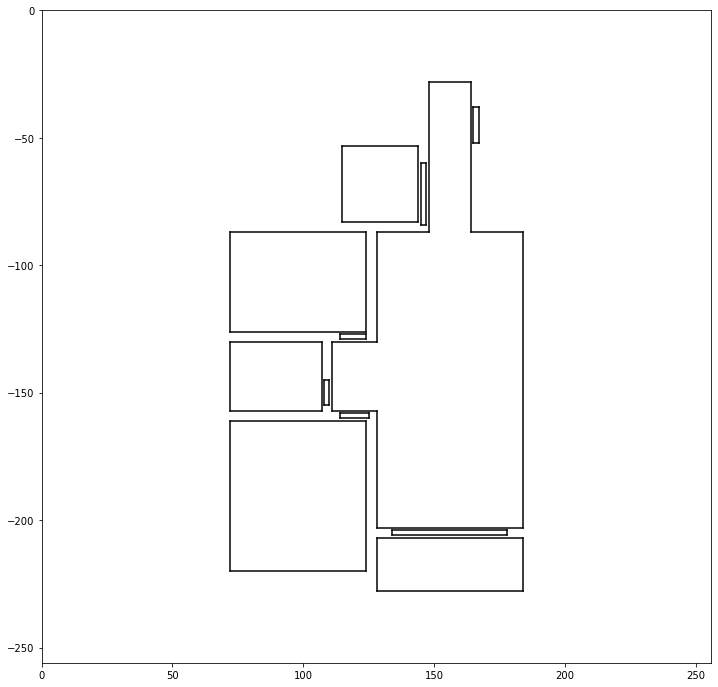

In [12]:
from shapely.geometry import Polygon
import json

raster_to_json(line)

In [ ]:
# info about output structure at https://github.com/sepidsh/Housegan-data-reader